<a href="https://colab.research.google.com/github/MasumeShariftabar/MachineLearning2023/blob/main/ML_MP1_1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q3-1

In [ ]:
# upload data in collab from google drive
!gdown 1itgkDw3V40dByzGBGUhIPs2HyPiJRrKB

# place dataset in folder
import os
folder_name = "Data"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

%cd Data

Downloading...
From: https://drive.google.com/uc?id=1itgkDw3V40dByzGBGUhIPs2HyPiJRrKB
To: /content/Data/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 142MB/s]
/content/Data/Data


Q3-2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#upload dataset as dataframe
df = pd.read_csv('/content/heart_disease_health_indicators.csv')
#df

# Separate the data into two classes
class_1_data = df[df['HeartDiseaseorAttack'] == 1].head(100)
#print("class 1 = \n", class_1_data, "\n")
class_0_data = df[df['HeartDiseaseorAttack'] == 0].head(100)
#print("class 0 = \n", class_0_data, "\n")

# Create two new DataFrames for each class
df_class_1 = pd.DataFrame(class_1_data, copy=True)
df_class_0 = pd.DataFrame(class_0_data, copy=True)

# to use these two DataFrames for further steps
df_class_0.to_csv('class_0_data.csv', index=False)
df_class_1.to_csv('class_1_data.csv', index=False)
#class_1_data
class_0_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,1,1,1,26,0,0,0,0,1,...,1,0,5,0,20,1,0,13,6,4
112,0,0,0,1,30,1,0,0,0,0,...,1,0,3,0,0,0,1,9,4,6
113,0,1,0,1,27,0,0,0,1,1,...,1,0,3,0,0,0,1,8,6,8
114,0,0,1,1,26,0,0,0,1,1,...,1,0,2,1,0,0,0,8,6,6


Q3-3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Combine the two classes into a new DataFrame
combined_df = pd.concat([df_class_0, df_class_1], ignore_index=True)
combined_df = shuffle(combined_df)
# Separate features (X) and target (y)
X = combined_df.drop('HeartDiseaseorAttack', axis=1)  # Assuming 'target' is the column you want to predict
y = combined_df['HeartDiseaseorAttack']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################################## Train & find Accuracy ###########################
##LogisticRegression
model = LogisticRegression(solver = 'sag' , max_iter = 1000 , random_state=13)
model.fit(x_train, y_train)   #train
model_predict = model.predict(x_test)   #test...it gives us y_hat_test
log_accuracy = accuracy_score(y_test, model_predict)   # accuracy
print(f'Logistic Regression Accuracy: {log_accuracy:.2f}')

##SGDClassifier()
model1 = SGDClassifier(loss='log_loss', random_state=13)
model1.fit(x_train, y_train)              #train
model1_predict = model1.predict(x_test)   #test
SGD_accuracy = accuracy_score(y_test, model1_predict)            #accuracy
print(f'SGD Classifier Accuracy: {SGD_accuracy:.2f}')

X.shape , model_predict.shape , model1_predict.shape


Logistic Regression Accuracy: 0.72
SGD Classifier Accuracy: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


((200, 21), (40,), (40,))

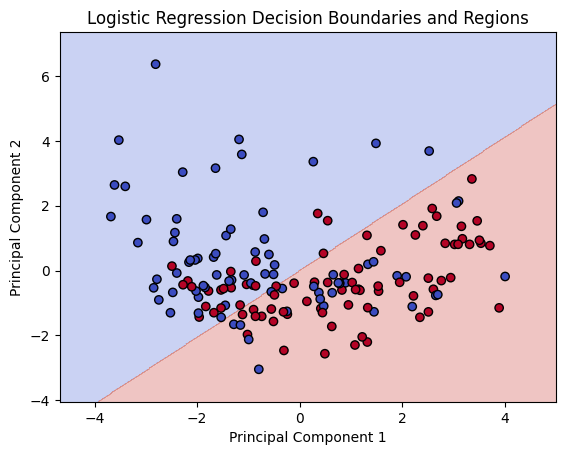

In [ ]:
## Plot decision boundary for LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Apply PCA to reduce the data to 2D for visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Create a meshgrid to plot the decision boundaries
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and regions
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the examples
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('Logistic Regression Decision Boundaries and Regions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Q3-4

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


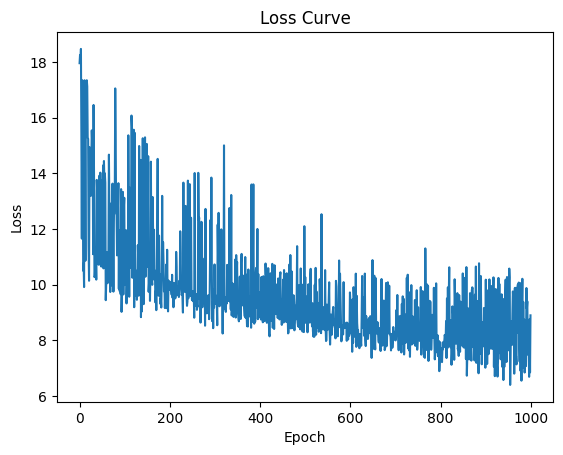

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss


model1 = SGDClassifier(loss='log', random_state=13)
losses = []
epochs = 1000

for _ in range(epochs):
    model1.partial_fit(x_train, y_train, [0, 1])
    loss = log_loss(y_train , model1.predict_proba(x_train))
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


Q3-5

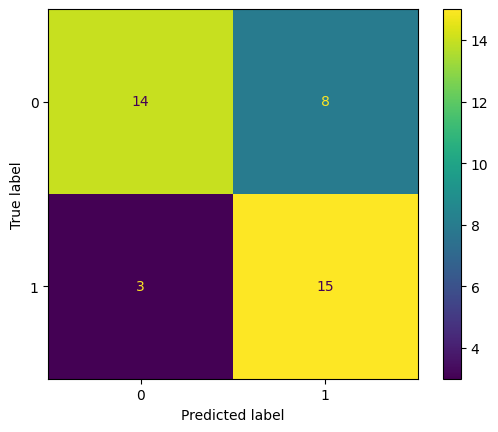

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test , model_predict)
F1 = f1_score(y_test , model_predict , average=None)
F1
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()